In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

I have used another image for my assignment

In [0]:
#image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")
# I have used this new image for my analysis and assignment.
image = url_to_image("https://homepages.cae.wisc.edu/~ece533/images/airplane.png")

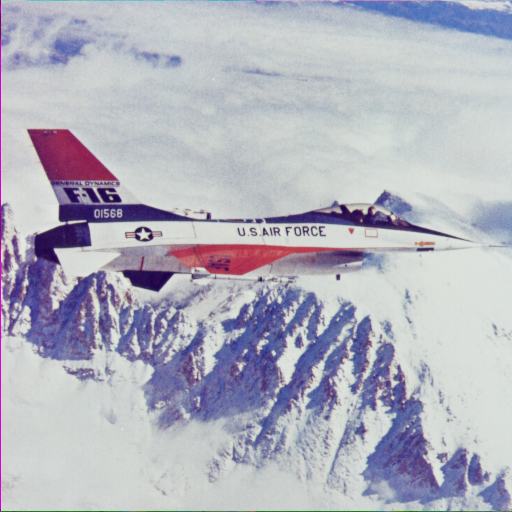

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

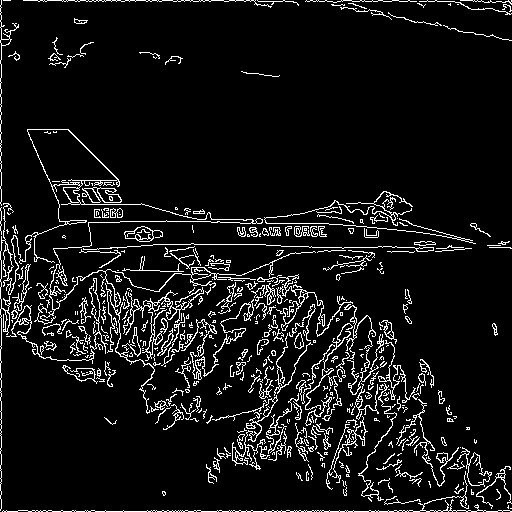

In [7]:
cv2_imshow(edges)

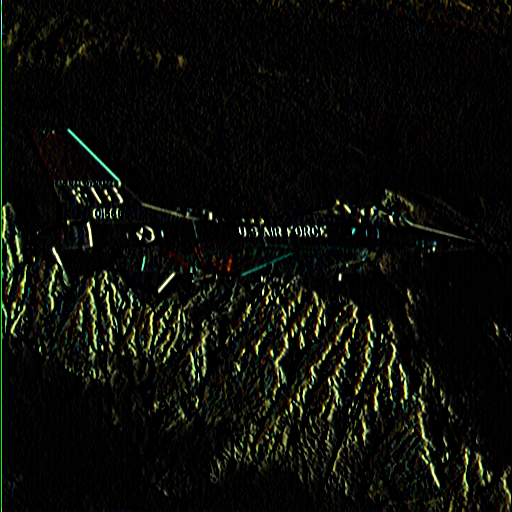

In [8]:
# Vertical filter (with first column as -1)
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

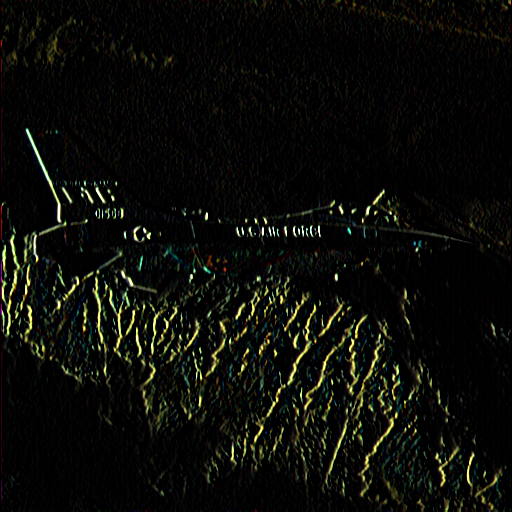

In [9]:
# Vertical filter (with last column as -1)
kernel = np.float32([[1,0,-1],[1,0,-1],[1,0,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

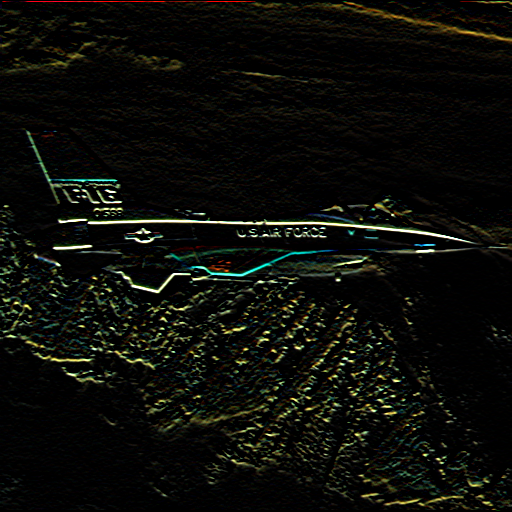

In [10]:
# Horizontal Filter (with first row as -1)
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

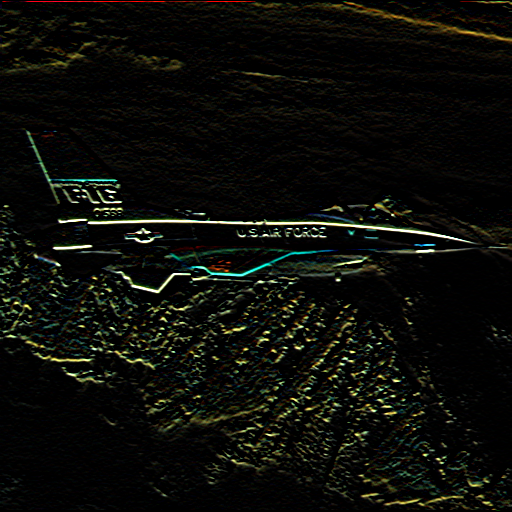

In [11]:
# Horizontal filter (with last row as -1)
kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

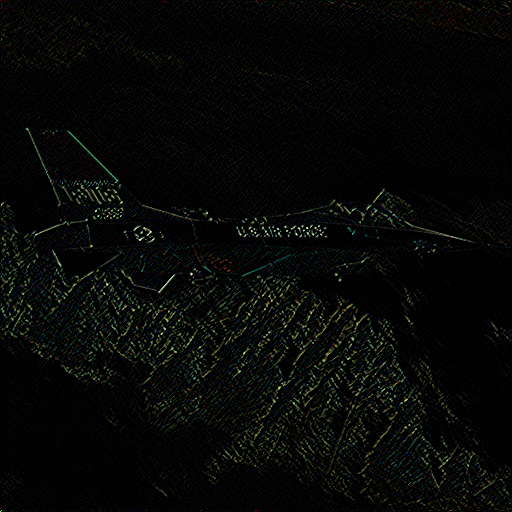

In [12]:
# 45 Degree Angle Detector (either)

kernel = np.array([[-1, -1, 2],
                   [-1, 2, -1],
                   [2, -1, -1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

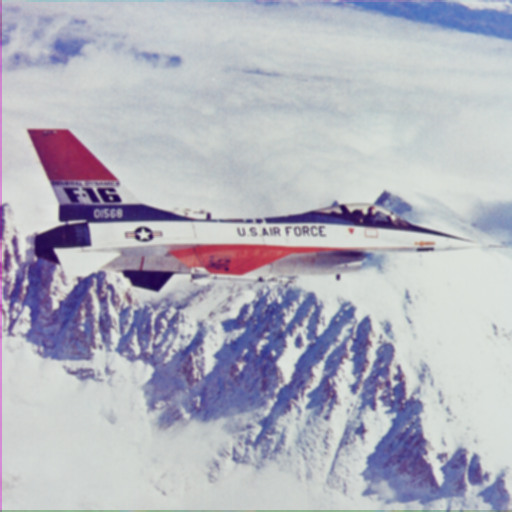

In [13]:
# Blur Kernel
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

In the above snippet, I have taken average of all values of kernel to get the average of pixels around anchor pixel to make the image blur.

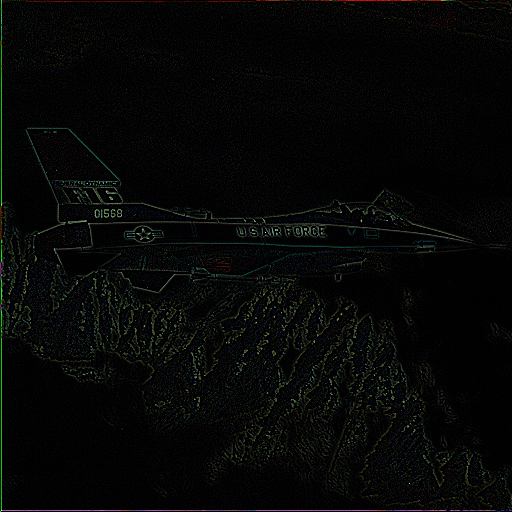

In [16]:
# Sharpen Kernel with anchor pixel = 4
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

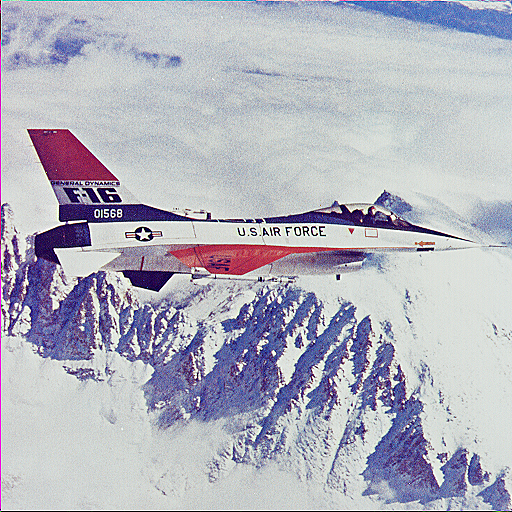

In [17]:
# Sharpen Kernel with anchor pixel = 5
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

This kernel works based on the differences between the adjacent pixels. It makes the image look more clear. So, I kept tried to keep the anchor pixel positive and relatively bigger, just to make the difference bigger.I observed that if the anchor pixel value is lesser than or equal to 3 then it is producing a black image, after manually varifying it, I found that the reason for this was the non-positive values of pixels after convolution, which resulted in black image. Again, when I kept it 4, then it was producing an image which looked like an edge detector but when I kept it 5 then only I was able to get the visibly sharpened image. Above are two images with anchor pixel value equal to 4 and 5 respectively.

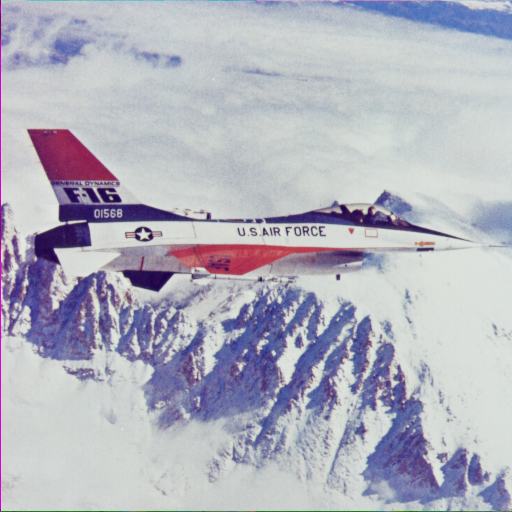

In [15]:
# Identity function (doesn't do anything)
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

First of all I tried with identity matrix but it din't work, I was getting very bright image. I think, what is did was nothing but increased the brightness of each pixels. Then, I realized that, the purpose of the identity kernel is to get the same value for each of the pixels of the source image and it was possible only when all the elements of kernel are equal to 0 but the anchor pixel is equal to 1, then only we would be able to retain the same value for each of the pixels.